## Importing header files

In [72]:
%matplotlib inline
%pylab inline
import pandas as pd
import tensorflow as tf
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa
import glob
import librosa.display

Populating the interactive namespace from numpy and matplotlib


## Reading the csv file 

In [2]:
media_df = pd.read_csv('WhaleFM\csv\whale_fm_anon_04-03-2015_assets.csv')

In [3]:
media_df.head(5)

,id,name,location,thumbnail_location,classification_count,external_ref,average_score,active,workflow_id,zooniverse_id,...,lng,random_number,whale_id,whale_type,narrowband,spectrogram_12,skip_count,duration_wav,sound_count,sound_list
0,1,gm138b01INFO_104397737-104654208.wav,http://s3.amazonaws.com/whalefm/alpha/audio/gm...,NaN,1143,NaN,0,1,1,AWH1000001,...,13.7929,0.120226,15,pilot whale,2,http://s3.amazonaws.com/whalefm/alpha/spectrog...,16,1.336,3109,"19,33,85"
1,2,gm138b01INFO_11783503-11917392.wav,http://s3.amazonaws.com/whalefm/alpha/audio/gm...,NaN,327,NaN,0,1,1,AWH1000002,...,13.7847,0.409283,15,pilot whale,2,http://s3.amazonaws.com/whalefm/alpha/spectrog...,3,0.697,3137,"1762,1765,1858"
2,3,gm138b01INFO_1183156-1470951.wav,http://s3.amazonaws.com/whalefm/alpha/audio/gm...,NaN,137,NaN,0,1,1,AWH1000003,...,13.7815,0.558004,15,pilot whale,2,http://s3.amazonaws.com/whalefm/alpha/spectrog...,12,1.499,357,"3300,3344,3476"
3,4,gm138b01INFO_156175623-156362321.wav,http://s3.amazonaws.com/whalefm/alpha/audio/gm...,NaN,352,NaN,0,1,1,AWH1000004,...,13.7846,0.321231,15,pilot whale,2,http://s3.amazonaws.com/whalefm/alpha/spectrog...,4,0.972,3542,"30,52,59"
4,5,gm138b01INFO_1612800-1694979.wav,http://s3.amazonaws.com/whalefm/alpha/audio/gm...,NaN,18,NaN,0,1,1,AWH1000005,...,13.7815,0.322756,15,pilot whale,2,http://s3.amazonaws.com/whalefm/alpha/spectrog...,4,0.428,740,"300,3676,3993"


## Getting the stats to understand data
### Total number if recordings: 15531

In [41]:
media_df.describe()

,id,thumbnail_location,classification_count,external_ref,average_score,active,workflow_id,spectral_density,duration,lat,lng,random_number,whale_id,narrowband,skip_count,duration_wav,sound_count
count,15531.000000,0.0,15531.000000,0.0,15531.0,15531.0,15531.0,15531.000000,15531.000000,15531.000000,15531.000000,15531.000000,15531.000000,15531.00000,15531.000000,15531.000000,15531.000000
mean,7782.101861,NaN,35.824673,NaN,0.0,1.0,1.0,4.774382,0.941586,58.150916,-8.042049,0.501410,14.019252,1.04990,8.424828,1.294287,3250.325929
std,4487.815218,NaN,51.081333,NaN,0.0,0.0,0.0,4.016661,0.587930,17.636353,37.508379,0.288886,7.604220,0.80574,8.209786,0.720738,1982.764057
min,1.000000,NaN,2.000000,NaN,0.0,1.0,1.0,2.063000,0.000000,24.308700,-77.628100,0.000040,1.000000,0.00000,0.000000,0.018000,0.000000
25%,3902.500000,NaN,17.000000,NaN,0.0,1.0,1.0,2.625000,0.511000,63.413675,-20.352404,0.254365,8.000000,0.00000,3.000000,0.741000,1970.000000
50%,7785.000000,NaN,22.000000,NaN,0.0,1.0,1.0,3.375000,0.850000,67.484500,13.746000,0.500551,17.000000,1.00000,5.000000,1.190000,2868.000000
75%,11667.500000,NaN,38.000000,NaN,0.0,1.0,1.0,5.250000,1.300000,68.198850,15.595900,0.752043,20.000000,2.00000,11.000000,1.850000,4070.000000
max,15550.000000,NaN,1232.000000,NaN,0.0,1.0,1.0,29.000000,8.553000,68.442864,16.561155,0.999978,26.000000,2.00000,56.000000,11.962000,8018.000000


In [4]:
media_df.columns

Index(['id', 'name', 'location', 'thumbnail_location', 'classification_count',
       'external_ref', 'average_score', 'active', 'workflow_id',
       'zooniverse_id', 'created_at', 'updated_at', 'spectral_density',
       'duration', 'spectrogram', 'lat', 'lng', 'random_number', 'whale_id',
       'whale_type', 'narrowband', 'spectrogram_12', 'skip_count',
       'duration_wav', 'sound_count', 'sound_list'],
      dtype='object')

In [5]:
media_df.shape

(15531, 26)

In [6]:
media_df['whale_id'].unique()

array([15, 16, 17, 18, 19,  1,  2, 22,  3,  4, 21, 20,  7,  6,  5,  8,  9,
       10, 11, 12, 13, 14, 23, 24, 25, 26], dtype=int64)

In [7]:
media_df['location'][1]

'http://s3.amazonaws.com/whalefm/alpha/audio/gm138b01INFO_11783503-11917392_filt.mp3'

In [44]:
sum(media_df.groupby('whale_id').count()['id'].sort_values(inplace = False ,ascending = False)[:17].values)

14645

In [8]:
sorted(media_df.groupby('whale_id').count()['id'].values)

[14,
 18,
 62,
 77,
 97,
 116,
 146,
 157,
 199,
 200,
 216,
 288,
 303,
 329,
 358,
 449,
 561,
 600,
 611,
 823,
 824,
 989,
 1020,
 1148,
 1536,
 4390]

## Checking what pods have sufficient number of samples. In our case threshold has been set to 200

C:\Users\ranji\Anaconda3\envs\tensorenviron\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


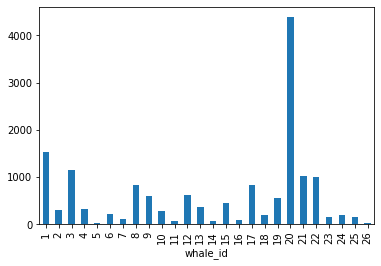

In [9]:
(media_df.groupby('whale_id').count()['id']).plot('bar')


## 17 pods with samples more than 200

In [88]:
media_df.groupby('whale_id').count()['id'].sort_values(inplace = False ,ascending = False)[:17]

whale_id
20    4390
1     1536
3     1148
21    1020
22     989
17     824
8      823
12     611
9      600
19     561
15     449
13     358
4      329
2      303
10     288
6      216
24     200
Name: id, dtype: int64

In [21]:
media_df['location'][0]

'http://s3.amazonaws.com/whalefm/alpha/audio/gm138b01INFO_104397737-104654208_filt.mp3'

In [81]:
media_df['whale_type'][15526]

'killer whale '

In [83]:
media_df['location'][15526]

'http://s3.amazonaws.com/whalefm/alpha/audio/oo06_317s_01_60268705_filt.mp3'

##  Sample Whale call - Pilot whale

In [47]:
ipd.Audio('http://s3.amazonaws.com/whalefm/alpha/audio/gm138b01INFO_104397737-104654208_filt.mp3')

## Sample whale call - Killer Whale

In [87]:
ipd.Audio('http://s3.amazonaws.com/whalefm/alpha/audio/oo06_317s_01_60268705_filt.mp3')

In [59]:
audio, sampling_rate = librosa.core.load('data/gm138b01INFO_104397737-104654208_filt.mp3')

### audio is a numpy array returned by librosa

In [60]:
audio

array([-3.4317138e-06, -9.1469592e-05,  3.9762886e-05, ...,
       -7.0870685e-04, -9.4601111e-03,  0.0000000e+00], dtype=float32)

In [61]:
sampling_rate

22050

## Raw Wave form of a Pilot Whale wave call

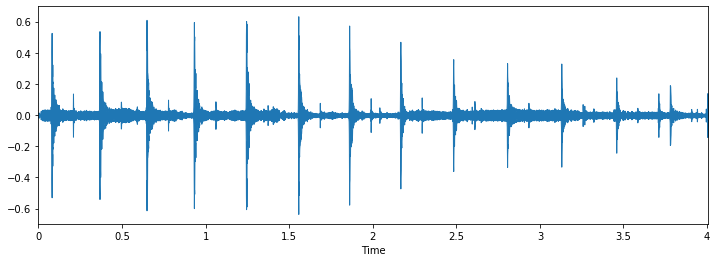

In [73]:
plt.figure(figsize=(12, 4))
librosa.display.waveplot(audio, sr=sampling_rate)

## Raw Wave form of a Killer Whale wave call


22050


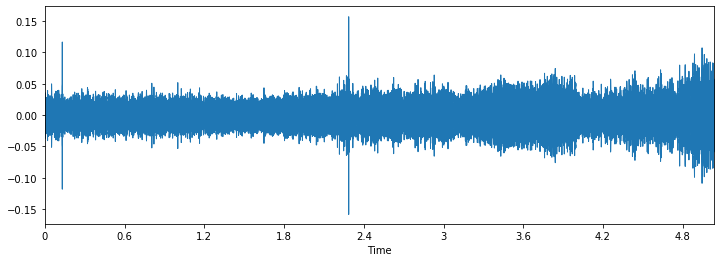

In [86]:
audio, sampling_rate = librosa.core.load('data/killer.mp3')
print(sampling_rate)
plt.figure(figsize=(12, 4))
librosa.display.waveplot(audio, sr=sampling_rate)
